Import all dependencies.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
from skimage.color import label2rgb
import glob
import matplotlib.pyplot as plt
import configparser

Import main python module (watershed_infer).

In [2]:
sys.path.insert(1, '../src')
from watershed_infer import *

Using TensorFlow backend.


Setup Config File Path.

In [ ]:
config_file_path='./demo_config.ini'

Read Images.

In [4]:
img_path = "./images/*.tif"
image_list = glob.glob(img_path)
img = np.zeros((len(image_list),1078,1278))

for i in range(len(image_list)):
    img[i,:,:] = cv2.imread(image_list[i], -1)

Plot Input images.

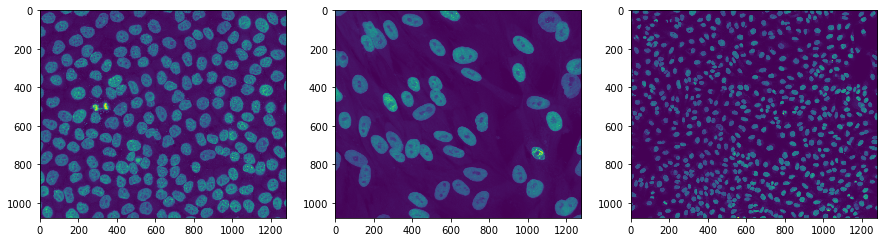

In [10]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(img[0])
axarr[1].imshow(img[1])
axarr[2].imshow(img[2])
plt.rcParams['figure.figsize'] = [15, 15]

Load Pre-trained model (Gaussian Blur DL Model).

In [6]:
modelwtsfname = "../model/run010/gaussian/trained.npy"
modeljsonfname = "../model/run010/gaussian/trained.json"
gaussian_blur_model = get_model(modeljsonfname,modelwtsfname)

Load Pre-trained model (Distance Map DL Model).

In [7]:
modelwtsfname = "../model/run010/edt/trained.npy"
modeljsonfname = "../model/run010/edt/trained.json"
distance_map_model = get_model(modeljsonfname,modelwtsfname)

Prediction (Instance Segmentation).

In [8]:
mask = watershed_infer(img,gaussian_blur_model,distance_map_model,config_file_path)

3/3 [==============================] - 44s 15s/step
Time For Predicting =  43.651590905
3/3 [==============================] - 43s 14s/step
Time For Predicting =  42.604108823000004


Plot Output images.

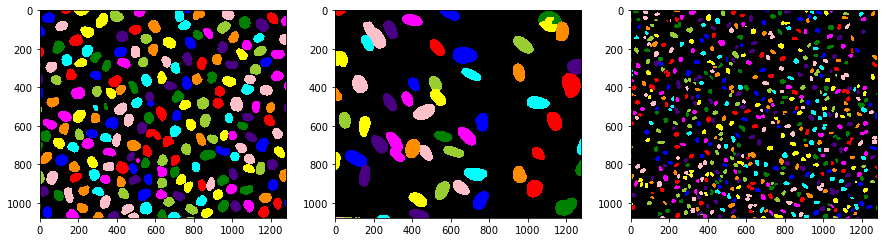

In [15]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(label2rgb(mask[0],bg_color=(0, 0, 0),bg_label=0))
axarr[1].imshow(label2rgb(mask[1],bg_color=(0, 0, 0),bg_label=0))
axarr[2].imshow(label2rgb(mask[2],bg_color=(0, 0, 0),bg_label=0))
plt.rcParams['figure.figsize'] = [15, 15]